# EDA

Exploratory Data Analysis adalah proses yang memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya. 

Dalam proses ini pemahaman konteks data juga diperhatikan karena akan menjawab masalah - masalah dasar.

## Import Libraries

Import library yang akan digunakan

In [1]:
import ast
from datetime import timedelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

Load dataset hasil scraping

In [2]:
data = pd.concat([
    pd.read_csv("../data/Crawling Twitter Jakarta 20 - 22.csv"),
    pd.read_csv("../data/Crawling Twitter Jakarta 23 - 25.csv"),
    pd.read_csv("../data/Crawling Twitter Jakarta 26.csv")
])
data["tanggal"] = pd.to_datetime(data["tanggal"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48985 entries, 0 to 5229
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   48985 non-null  datetime64[ns]
 1   tweets    48985 non-null  object        
 2   username  48985 non-null  object        
 3   retweet   48985 non-null  int64         
 4   source    48985 non-null  object        
 5   hashtags  48985 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.6+ MB


## EDA

Melakukan `Exploratory Data Analysis` pada data.

### Tweet perhari

Mengecek banyaknya tweet perharinya

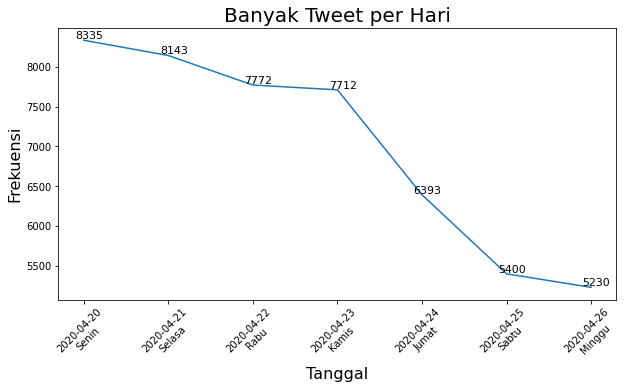

In [3]:
# Melihat banyak Tweet perhari
tph = data["tweets"].groupby(data["tanggal"].dt.date).count()
h_index = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]
hari = [str(x) + f"\n{h_index[x.weekday()]}" for x in tph.index]

# Plotting Line
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(len(tph.values)), y=tph.values)
for i, v in enumerate(tph.tolist()):
    plt.text(i - 0.1, v + 20, str(v), fontsize=11)
plt.title("Banyak Tweet per Hari", fontsize=20)
plt.xticks(range(len(tph.values)), hari, rotation=45)
plt.xlabel("Tanggal", fontsize=16)
plt.ylabel("Frekuensi", fontsize=16)
plt.show()

**Insight**

Dapat dilihat jika jumlah tweet menurun dari hari senin sampai hari minggu. Hal ini cukup mengejutkan karena penurunan terus terjadi sampai dengan weekend.

### Tweet perjam

Sekarang akan dilihat banyaknya tweet perjamnya.

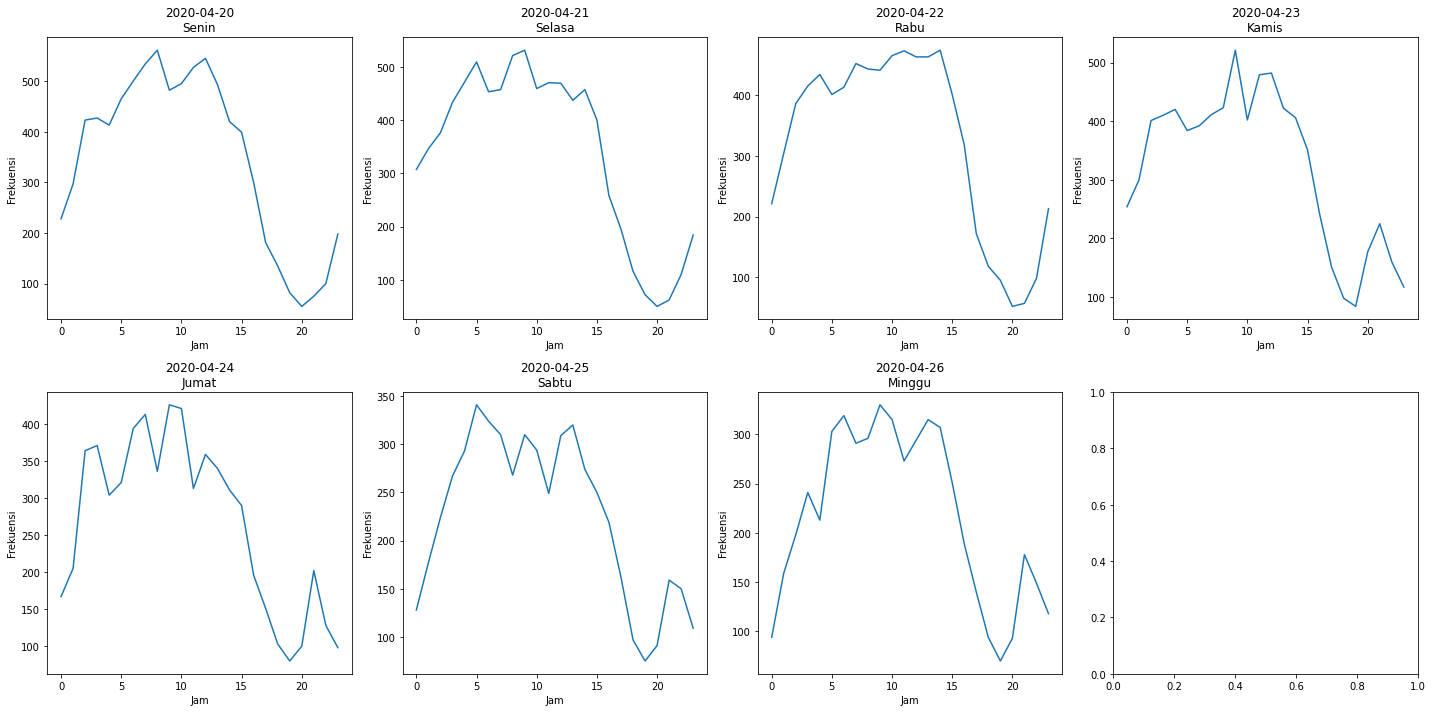

In [4]:
# Melihat banyak Tweet perjam
tpj = []
for x in tph.index:
    temp = data["tanggal"][
        (data["tanggal"] >= str(x)) & (data["tanggal"] < str(x + timedelta(days=1)))
    ]
    tpj.append(temp.groupby(temp.dt.hour).count())
    
# Ploting Line
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
for i in range(len(tpj)):
    sns.lineplot(x=tpj[i].index.tolist(), y=tpj[i].values, ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f"{hari[i]}")
    axes[i // 4, i % 4].set(xlabel="Jam", ylabel="Frekuensi")
    plt.tight_layout()
plt.show()

**Insight**

Dapat dilihat bahwa user optimal melakukan tweet pada pukul 7 - pukul 15, selanjutnya akan terjadi penurunan jumlah tweet pada pukul 15 sampai dengan pukul 20. Selanjutnya jumlah tweet kembali naik pada pukul 20 dan kemudian menurun pada pukul 21 / 22.

### Hashtag terbanyak

Melihat hashtag terbanyak yang digunakan.

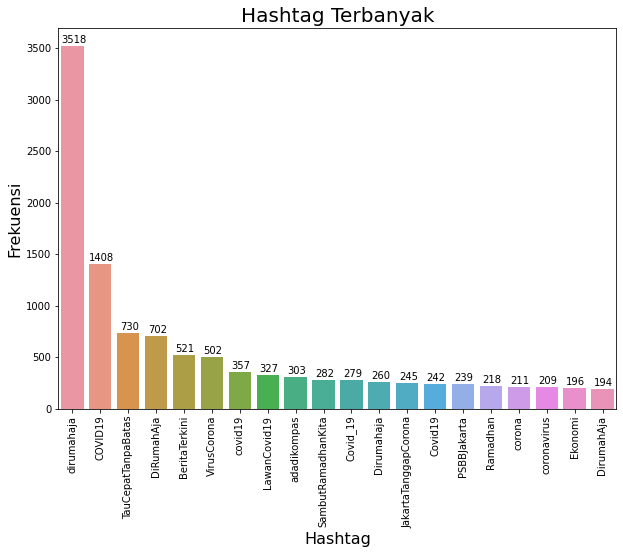

In [5]:
# Menghitung banyak hashtag terkait
freks = {}
for x in data["hashtags"].values:
    x = ast.literal_eval(x)
    for i in x:
        if i not in freks:
            freks[i] = 1
        else:
            freks[i] += 1
            
hashtag = (pd.DataFrame({"hashtag": freks.keys(), "frekuensi": freks.values()})
           .sort_values(by="frekuensi", ascending=False))

# Plot 20 Hashtag terbanyak
plt.figure(figsize=(10, 7))
sns.barplot(data=hashtag.head(20), x="hashtag", y="frekuensi")
for i, v in enumerate(hashtag.head(20)["frekuensi"].tolist()):
    plt.text(i - len(str(v)) / 10, v + 30, str(v), fontsize=10)
plt.title("Hashtag Terbanyak", fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("Hashtag", fontsize=16)
plt.ylabel("Frekuensi", fontsize=16)
plt.show()

### Source (Device) Terbanyak

Dilihat Source/Device terbanyak yang digunakan oleh user.

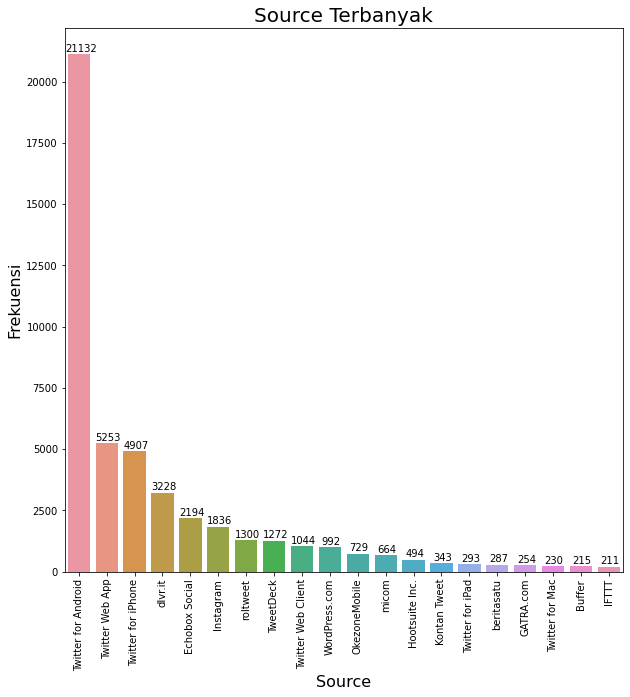

In [6]:
# Source count
source = data["source"].groupby(data["source"]).count()
source = pd.DataFrame({"source": source.index.tolist(), "frekuensi": source.values})
source = source.sort_values(by="frekuensi", ascending=False)

# Plot 20 Source terbanyak
plt.figure(figsize=(10, 10))
sns.barplot(data=source.head(20), x="source", y="frekuensi")
for i, v in enumerate(source.head(20)["frekuensi"].tolist()):
    plt.text(i - len(str(v)) / 10, v + 100, str(v), fontsize=10)
plt.title("Source Terbanyak", fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("Source", fontsize=16)
plt.ylabel("Frekuensi", fontsize=16)
plt.show()